## Phone Data

In [1]:
import os
import statistics
import csv
import itertools
import keras
import sklearn.linear_model

import pandas as pd
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

from tqdm import tqdm_notebook as tqdm
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import *
from keras.utils import to_categorical
from keras.optimizers import Adam

Using TensorFlow backend.
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
act_path = "wisdm-dataset/activity_key.txt"
act_file = open(act_path,"r")
act_list = act_file.read().split('\n')
act_map = {}
for elem in act_list:
    split = elem.split(" = ")
    if len(split) < 2:
        continue
    act_map[split[1]] = split[0]
#map of activies: Label : action    
act_map

{'A': 'walking',
 'B': 'jogging',
 'C': 'stairs',
 'D': 'sitting',
 'E': 'standing',
 'F': 'typing',
 'G': 'teeth',
 'H': 'soup',
 'I': 'chips',
 'J': 'pasta',
 'K': 'drinking',
 'L': 'sandwich',
 'M': 'kicking',
 'O': 'catch',
 'P': 'dribbling',
 'Q': 'writing',
 'R': 'clapping',
 'S': 'folding'}

In [3]:
phone = pd.read_pickle('phone.df')

In [4]:
window_size = 100
stride = window_size

frames = []
for i in tqdm(range(0, len(phone)-window_size, stride)):
    window = phone.iloc[i:i+window_size]
    if window['activity'].nunique() == 1:
        frames.append(window)

In [5]:
activities = sorted(act_map.keys())
activity_encoding = {v: k for k, v in enumerate(activities)}

X_list = []
y_list = []

#for each frame replace label with activity
for frame in tqdm(frames):
    X_list.append(frame[['phone_accel_x', 'phone_accel_y', 'phone_accel_z', 'phone_gyro_x', 'phone_gyro_y', 'phone_gyro_z']].values)
    y_list.append(activity_encoding[frame.iloc[0]['activity']])

In [6]:
X = np.array(X_list)
y = np.array(to_categorical(y_list))

In [7]:
print(X.shape)
print(y.shape)

(46906, 100, 6)
(46906, 18)


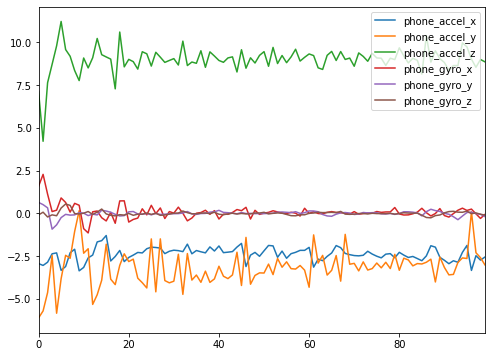

In [8]:
#six datapoints: phone, watch and each has accel and gyros data 
#example: xyz of accel for phone is 0 1 2 
#n is index into the dataframe of the X_list which is list of all of the windows
n = 16000
data_example= pd.DataFrame(X_list[n])

# Reverse activity encoding encodes index like 3 -> eating sandwich
reverse_activity_encoding = {v: act_map[k] for k, v in activity_encoding.items()}

plt.rcParams["figure.figsize"] = (8,6)

axis = data_example.plot()
axis.legend(['phone_accel_x', 'phone_accel_y', 'phone_accel_z', 'phone_gyro_x', 'phone_gyro_y', 'phone_gyro_z'])
plt.show()

In [9]:
#data split: as informed by slides split for 30,000 examples 
#our example is a window and coming from a big expansive amount of data
#5 second split based on papers using 5 sec split. We can play with this 

X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

#train
print("X_train: ",X_train.shape)

#dev
print("X_val: ",X_val.shape)

#test
print("X_test: ",X_test.shape)

print("Y_train: ",y_train.shape)
print("Y_val: ",y_val.shape)
print("Y_test: ",y_test.shape)

X_train:  (28143, 100, 6)
X_val:  (9381, 100, 6)
X_test:  (9382, 100, 6)
Y_train:  (28143, 18)
Y_val:  (9381, 18)
Y_test:  (9382, 18)


In [34]:
#data split: as informed by slides split for 30,000 examples 
#our example is a window and coming from a big expansive amount of data
#5 second split based on papers using 5 sec split. We can play with this 

X_train_2, X_valtest_2, y_train_2, y_valtest_2 = train_test_split(X, y, test_size=0.1, random_state=42)
X_val_2, X_test_2, y_val_2, y_test_2 = train_test_split(X_valtest_2, y_valtest_2, test_size=0.1, random_state=42)

#train
print("X_train_2: ",X_train_2.shape)

#dev
print("X_val_2: ",X_val_2.shape)

#test
print("X_test_2: ",X_test_2.shape)

print("Y_train_2: ",y_train_2.shape)
print("Y_val_2: ",y_val_2.shape)
print("Y_test_2: ",y_test_2.shape)

X_train_2:  (42215, 100, 6)
X_val_2:  (4221, 100, 6)
X_test_2:  (470, 100, 6)
Y_train_2:  (42215, 18)
Y_val_2:  (4221, 18)
Y_test_2:  (470, 18)


## LogReg Baseline

In [35]:
# lrModel = sklearn.linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
# X_train_flattened = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
# print("X: ",X_train_flattened.shape)
# lrModel.fit(X_train_flattened, y_train.argmax(axis=1))

In [36]:
# lrModel2 = sklearn.linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
# X_train_flattened_2 = X_train_2.reshape((X_train_2.shape[0], X_train_2.shape[1] * X_train_2.shape[2]))
# print("X2: ",X_train_flattened_2.shape)
# lrModel2.fit(X_train_flattened_2, y_train_2.argmax(axis=1))

In [37]:
# #logreg results
# predictions = lrModel.predict(X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]))
# score = lrModel.score(X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]), y_val.argmax(axis=1))
# print(score)

In [38]:
# #logreg results
# predictions2 = lrModel2.predict(X_val_2.reshape(X_val_2.shape[0], X_val_2.shape[1]*X_val_2.shape[2]))
# score2 = lrModel2.score(X_val_2.reshape(X_val_2.shape[0], X_val_2.shape[1]*X_val_2.shape[2]), y_val_2.argmax(axis=1))
# print("X2 score: ", score2)

In [39]:
# #As you can see: there's a locality of mispredictions around sports (kickingm catch, dribbling)
# cm = confusion_matrix(y_val.argmax(axis=1), predictions)
# df_cm = pd.DataFrame(cm, index = [reverse_activity_encoding[i] for i in range(18)], columns = [reverse_activity_encoding[i] for i in range(18)])
# plt.figure(figsize = (14,14))
# sn.heatmap(df_cm, annot=True, fmt='g')

In [40]:
# #As you can see: there's a locality of mispredictions around sports (kickingm catch, dribbling)
# cm2 = confusion_matrix(y_val_2.argmax(axis=1), predictions2)
# df_cm2 = pd.DataFrame(cm2, index = [reverse_activity_encoding[i] for i in range(18)], columns = [reverse_activity_encoding[i] for i in range(18)])
# plt.figure(figsize = (14,14))
# sn.heatmap(df_cm2, annot=True, fmt='g')

In [10]:
#Model 
# CNN
# =========
cnn_model = Sequential()

cnn_model.add(Conv1D(8, 3, activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(16, 3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(32, 3, activation='relu'))
cnn_model.add(BatchNormalization())

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(64, 3, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(y_train.shape[1], activation='softmax'))

# =========
cnn_model.build()
cnn_model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 98, 8)             152       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 8)             32        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 8)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 47, 16)            400       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 16)            64        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 23, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 21, 32)          

In [114]:
# LSTM
# =========
lstm_model = Sequential()

lstm_model.add(LSTM(64, return_sequences=True, input_shape=X_train.shape[1:]))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
# =========

In [115]:
# #Model .1 /.1 split

# model2 = Sequential()

# model2.add(Conv1D(8, 3, activation='relu', input_shape=X_train.shape[1:]))
# model2.add(BatchNormalization())
# model2.add(MaxPooling1D(pool_size=2))

# model2.add(Conv1D(16, 3, activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPooling1D(pool_size=2))

# model2.add(Conv1D(32, 3, activation='relu'))
# model2.add(BatchNormalization())

# model2.add(MaxPooling1D(pool_size=2))

# model2.add(Conv1D(64, 3, activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPooling1D(pool_size=2))

# model2.add(Flatten())
# model2.add(Dense(128, activation='relu'))
# model2.add(Dense(y_train.shape[1], activation='softmax'))

# # keras.utils.plot_model(
# #     model,
# #     to_file='model_plot_4-ConvLayer.png',
# #     show_shapes=True,
# #     show_layer_names=True,
# # )

# model2.summary()



In [11]:
#loss function: using cross entropy
cnn_model.compile(Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [117]:
# #loss function: using cross entropy
# model2.compile(Adam(),
#               loss=keras.losses.categorical_crossentropy,
#               metrics=['acc'])

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)


Train on 28143 samples, validate on 9381 samples
Epoch 1/20
28143/28143 [==============================] - 23s 827us/step - loss: 2.1486 - acc: 0.2623 - val_loss: 1.9258 - val_acc: 0.3157
Epoch 2/20
28143/28143 [==============================] - 18s 645us/step - loss: 1.9054 - acc: 0.3324 - val_loss: 1.7750 - val_acc: 0.3854
Epoch 3/20
28143/28143 [==============================] - 19s 666us/step - loss: 1.8085 - acc: 0.3677 - val_loss: 1.7550 - val_acc: 0.3829
Epoch 4/20
28064/28143 [============================>.] - ETA: 0s - loss: 1.7383 - acc: 0.3882

In [119]:
# history2 = model2.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_val_2, y_val_2), verbose=1)

In [ ]:
metrics_history = pd.DataFrame(history.history)
metrics_history[['loss', 'val_loss']].plot() #loss = train loss, val_loss = validation Loss
metrics_history[['acc', 'val_acc']].plot() # acc = train acc, val_acc = validation acc

In [121]:
# metrics_history_2 = pd.DataFrame(history2.history)
# metrics_history_2[['loss', 'val_loss']].plot() #loss = train loss, val_loss = validation Loss
# metrics_history_2[['acc', 'val_acc']].plot() # acc = train acc, val_acc = validation acc

In [ ]:
y_val_pred = cnn_model.predict(X_val)

y_val_argmax = y_val.argmax(axis=1)
y_val_pred_argmax = y_val_pred.argmax(axis=1)

actual_val_activities = [reverse_activity_encoding[i] for i in y_val_argmax]
predicted_val_activities = [reverse_activity_encoding[i] for i in y_val_pred_argmax]

##### Below is Final Test Set results ######
y_test_pred = cnn_model.predict(X_test)
y_test_argmax = y_test.argmax(axis=1)
y_test_pred_argmax = y_test_pred.argmax(axis=1)
actual_test_activities = [reverse_activity_encoding[i] for i in y_test_argmax]
predicted_test_activities = [reverse_activity_encoding[i] for i in y_test_pred_argmax]

In [ ]:
print("             Phone Results with CNN for Validation Set\n\n" + classification_report(predicted_val_activities,actual_val_activities))
print("             Phone Results with CNN for Test Set\n\n" + classification_report(predicted_test_activities,actual_test_activities))

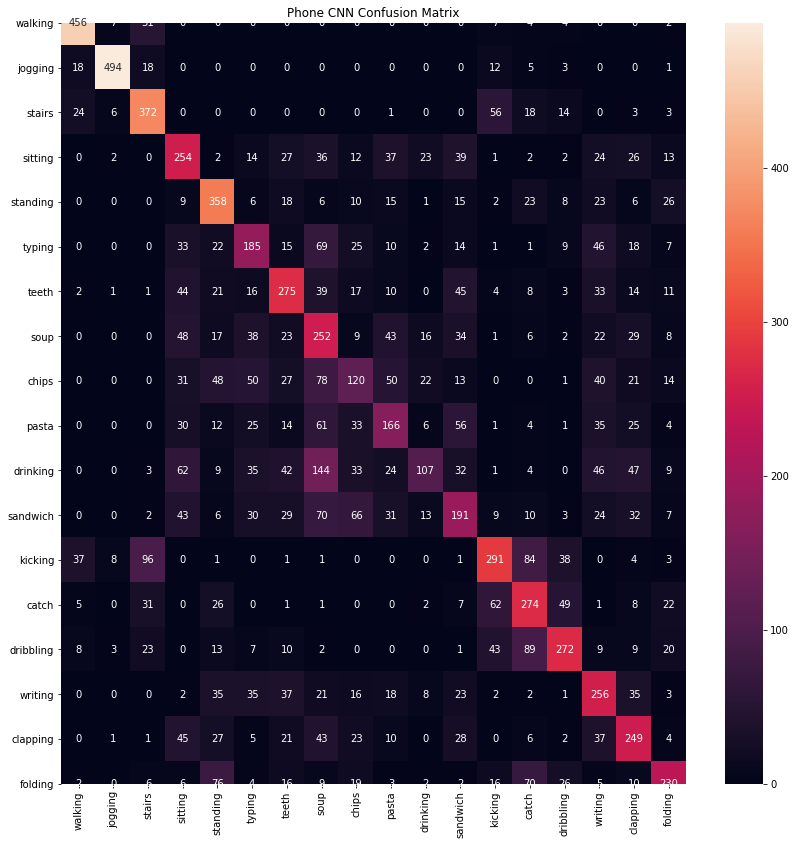

In [124]:
cm_val = confusion_matrix(y_val_argmax, y_val_pred_argmax)
val_df_cm = pd.DataFrame(cm_val, index = [reverse_activity_encoding[i] for i in range(18)], columns = [reverse_activity_encoding[i] for i in range(18)])
plt.figure(figsize = (14,14))
plt.title('Phone CNN Confusion Matrix')
sn.heatmap(val_df_cm, annot=True, fmt='g')

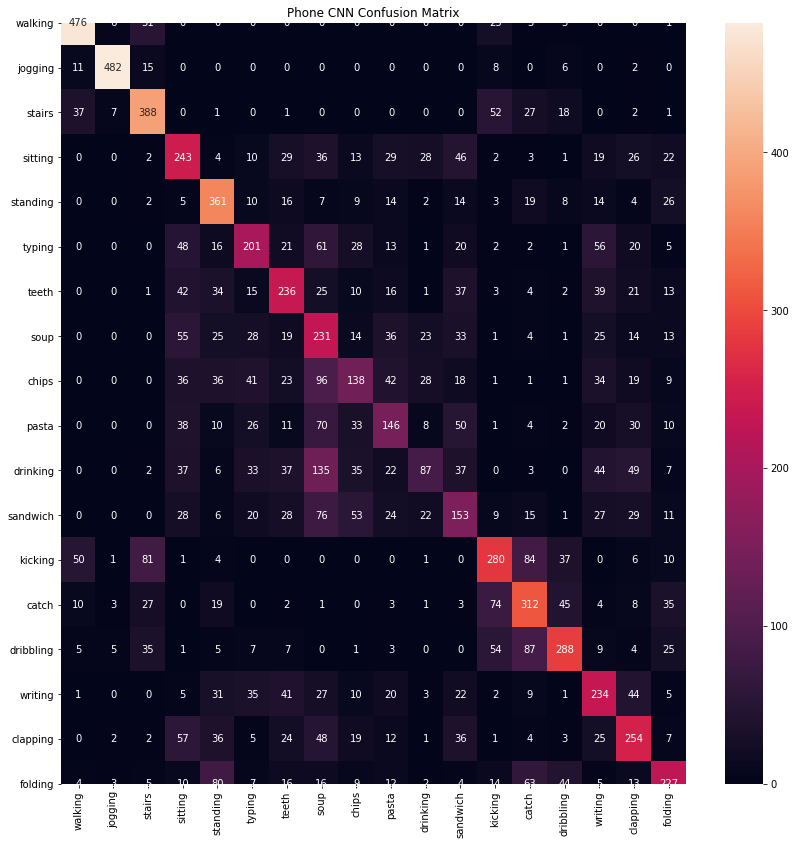

In [125]:
cm = confusion_matrix(y_test_argmax, y_test_pred_argmax)
df_cm = pd.DataFrame(cm, index = [reverse_activity_encoding[i] for i in range(18)], columns = [reverse_activity_encoding[i] for i in range(18)])
plt.figure(figsize = (14,14))
plt.title('Phone CNN Confusion Matrix')
sn.heatmap(df_cm, annot=True, fmt='g')

# Training + Evaluating Stacked LSTM

In [138]:
lstm_model.compile(Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['acc'])

In [147]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)

lstm_model.summary()

Train on 28143 samples, validate on 9381 samples
Epoch 1/30
28143/28143 [==============================] - 60s 2ms/step - loss: 1.0507 - acc: 0.6341 - val_loss: 1.2007 - val_acc: 0.5884
Epoch 2/30
28143/28143 [==============================] - 57s 2ms/step - loss: 1.0349 - acc: 0.6437 - val_loss: 1.1340 - val_acc: 0.6148
Epoch 3/30
28143/28143 [==============================] - 57s 2ms/step - loss: 0.9672 - acc: 0.6640 - val_loss: 1.0968 - val_acc: 0.6304
Epoch 4/30
28143/28143 [==============================] - 57s 2ms/step - loss: 0.9291 - acc: 0.6761 - val_loss: 1.1030 - val_acc: 0.6345
Epoch 5/30
28143/28143 [==============================] - 56s 2ms/step - loss: 0.8982 - acc: 0.6899 - val_loss: 1.0374 - val_acc: 0.6608
Epoch 6/30
28143/28143 [==============================] - 57s 2ms/step - loss: 0.9376 - acc: 0.6759 - val_loss: 1.0633 - val_acc: 0.6528
Epoch 7/30
28143/28143 [==============================] - 58s 2ms/step - loss: 0.8516 - acc: 0.7071 - val_loss: 1.0085 - val_acc:

In [152]:
lstm_y_val_pred = lstm_model.predict(X_val)

y_val_argmax = y_val.argmax(axis=1)
y_val_pred_argmax = lstm_y_val_pred.argmax(axis=1)

lstm_actual_val_activities = [reverse_activity_encoding[i] for i in y_val_argmax]
lstm_predicted_val_activities = [reverse_activity_encoding[i] for i in y_val_pred_argmax]

##### Below is Final Test Set results ######
lstm_y_test_pred = lstm_model.predict(X_test)
lstm_y_test_argmax = y_test.argmax(axis=1)

lstm_y_test_pred_argmax = lstm_y_test_pred.argmax(axis=1)

lstm_actual_test_activities = [reverse_activity_encoding[i] for i in lstm_y_test_argmax]
lstm_predicted_test_activities = [reverse_activity_encoding[i] for i in lstm_y_test_pred_argmax]

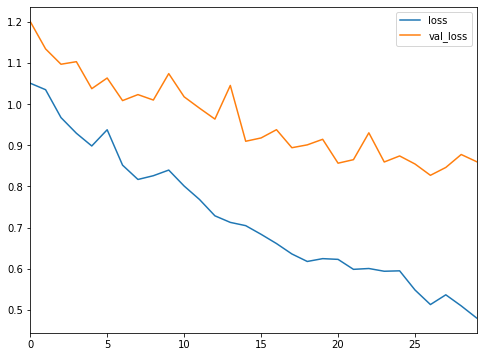

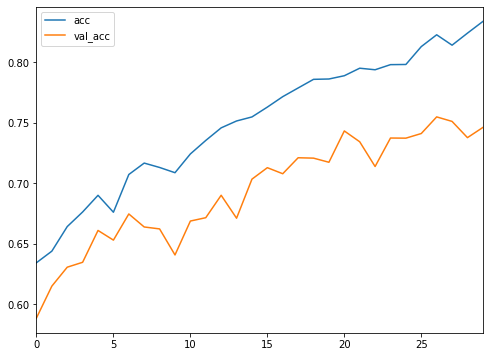

In [153]:
metrics_history = pd.DataFrame(history.history)

metrics_history[['loss', 'val_loss']].plot() #loss = train loss, val_loss = validation Loss
metrics_history[['acc', 'val_acc']].plot() # acc = train acc, val_acc = validation acc

In [154]:
print("             Phone Results with lSTM for Validation Set\n\n" + classification_report(lstm_predicted_val_activities,lstm_actual_val_activities))
print("             Phone Results with LSTM for Test Set\n\n" + classification_report(lstm_predicted_test_activities,lstm_actual_test_activities))

             Phone Results with lSTM for Validation Set

              precision    recall  f1-score   support

       catch       0.69      0.68      0.68       495
       chips       0.60      0.73      0.66       425
    clapping       0.68      0.73      0.70       470
   dribbling       0.76      0.67      0.71       571
    drinking       0.69      0.65      0.67       636
     folding       0.64      0.69      0.66       468
     jogging       0.97      0.98      0.97       548
     kicking       0.73      0.74      0.74       560
       pasta       0.62      0.74      0.68       395
    sandwich       0.72      0.64      0.68       645
     sitting       0.74      0.80      0.77       473
        soup       0.67      0.67      0.67       548
      stairs       0.83      0.87      0.85       471
    standing       0.83      0.72      0.77       607
       teeth       0.76      0.77      0.76       537
      typing       0.78      0.70      0.74       510
     walking       0.95 

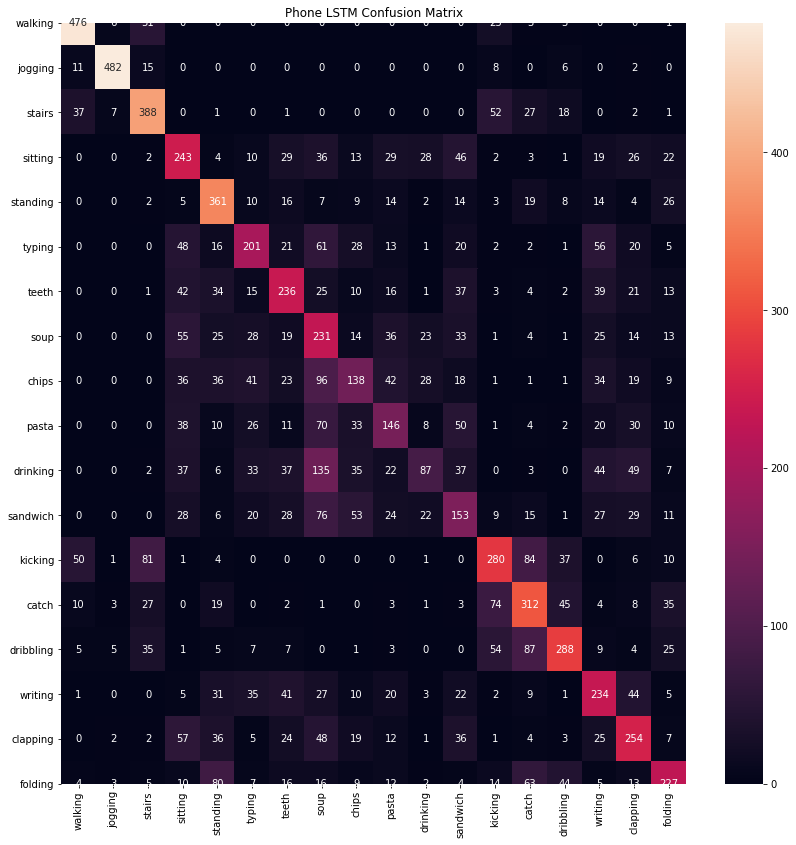

In [155]:
lstm_cm = confusion_matrix(y_test_argmax, y_test_pred_argmax)
df_cm = pd.DataFrame(lstm_cm, index = [reverse_activity_encoding[i] for i in range(18)], columns = [reverse_activity_encoding[i] for i in range(18)])
plt.figure(figsize = (14,14))
plt.title('Phone LSTM Confusion Matrix')
sn.heatmap(df_cm, annot=True, fmt='g')

# CNN-LSTM Network

In [80]:
# crnn_model = Sequential()
# # define CNN model
# crnn_model.add(TimeDistributed(Conv1D(8, 3, activation='relu', input_shape=X_train.shape[1:])))
# crnn_model.add(TimeDistributed(BatchNormalization()))
# crnn_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# # crnn_model.add(TimeDistributed(Conv1D(16, 3, activation='relu', input_shape=X_train.shape[1:])))
# # crnn_model.add(TimeDistributed(BatchNormalization()))
# # crnn_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# # crnn_model.add(TimeDistributed(Conv1D(32, 3, activation='relu', input_shape=X_train.shape[1:])))
# # crnn_model.add(TimeDistributed(BatchNormalization()))
# # crnn_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# # crnn_model.add(TimeDistributed(Conv1D(64, 3, activation='relu', input_shape=X_train.shape[1:])))
# # crnn_model.add(TimeDistributed(BatchNormalization()))
# # crnn_model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

# # model.add(TimeDistributed(Flatten()))
# # model.add(TimeDistributed(Dense(128, activation='relu')))
# # model.add(TimeDistributed(Dense(y_train.shape[1], activation='softmax')))

# # define LSTM model
# crnn_model.add(LSTM(64, return_sequences=True, input_shape=X_train.shape[1:]))
# crnn_model.add(LSTM(64))
# crnn_model.add(Dense(y_train.shape[1], activation='softmax'))

In [81]:
# #loss function: using cross entropy
# crnn_model.compile(Adam(),
#               loss=keras.losses.categorical_crossentropy,
#               metrics=['acc'])

In [83]:
# history = crnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)